# Replace and Change Data Types

In [1]:
import pandas as pd 
dataset=pd.read_csv(r"C:/Users/Smart/Downloads/loan_test.csv")
dataset.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              356 non-null    object 
 1   Married             367 non-null    object 
 2   Dependents          357 non-null    object 
 3   Education           367 non-null    object 
 4   Self_Employed       344 non-null    object 
 5   Applicant_Income    367 non-null    int64  
 6   Coapplicant_Income  367 non-null    int64  
 7   Loan_Amount         367 non-null    int64  
 8   Term                361 non-null    float64
 9   Credit_History      338 non-null    float64
 10  Area                367 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 31.7+ KB


In [3]:
dataset.isnull().sum()

Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   6
Credit_History        29
Area                   0
dtype: int64

In [4]:
dataset['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [5]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)

In [6]:
dataset['Dependents'].replace("3+","3",inplace=True)

In [7]:
dataset['Dependents']=dataset["Dependents"].astype("int64")
dataset

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3,Not Graduate,Yes,400900,177700,11300000,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,415800,70900,11500000,360.0,1.0,Urban
364,Male,No,0,Graduate,No,325000,199300,12600000,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,500000,239300,15800000,360.0,1.0,Rural


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              356 non-null    object 
 1   Married             367 non-null    object 
 2   Dependents          367 non-null    int64  
 3   Education           367 non-null    object 
 4   Self_Employed       344 non-null    object 
 5   Applicant_Income    367 non-null    int64  
 6   Coapplicant_Income  367 non-null    int64  
 7   Loan_Amount         367 non-null    int64  
 8   Term                361 non-null    float64
 9   Credit_History      338 non-null    float64
 10  Area                367 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 31.7+ KB


# Function Transformer

In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [10]:
dataset=pd.read_csv(r"C:/Users/Smart/Downloads/loan_test.csv")
dataset.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban


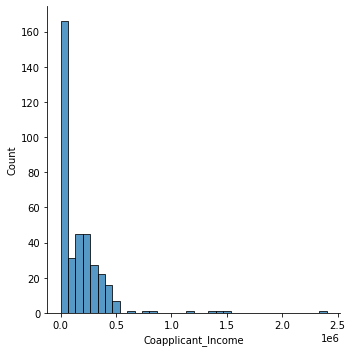

In [11]:

sns.displot(dataset['Coapplicant_Income'])
plt.show()

In [12]:
q1 = dataset["Coapplicant_Income"].quantile(0.25)  
q3 = dataset["Coapplicant_Income"].quantile(0.75) 

In [13]:
q1

0.0

In [14]:
q3

243050.0

In [15]:
iqr = q3 - q1
min_r = q1 - 1.5 * iqr
max_r = q3 + 1.5 * iqr

In [16]:
min_r,max_r

(-364575.0, 607625.0)

In [17]:
dataset=dataset[dataset["Coapplicant_Income"]<max_r]

In [18]:
from sklearn.preprocessing import FunctionTransformer

In [19]:
ft=FunctionTransformer(func=np.log1p)
ft.fit(dataset[["Coapplicant_Income"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [20]:
dataset["Coapplicant_Income_tf"]=ft.transform(dataset[["Coapplicant_Income"]])

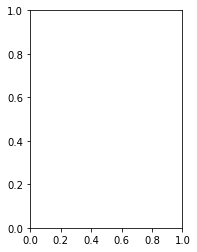

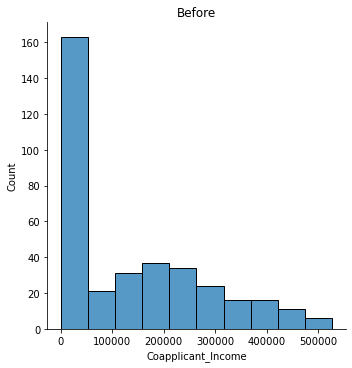

In [21]:
plt.subplot(1,2,1)
sns.displot(dataset['Coapplicant_Income'])
plt.title("Before")
plt.show()

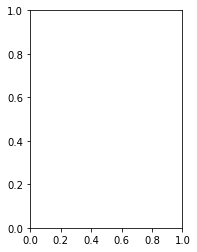

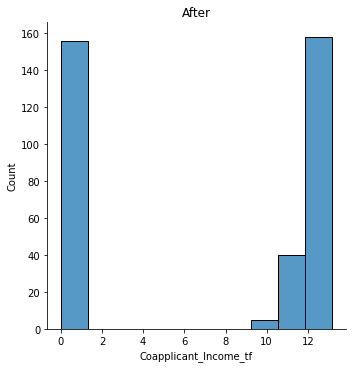

In [22]:
plt.subplot(1,2,1)
sns.displot(dataset['Coapplicant_Income_tf'])
plt.title("After")
plt.show()

# Backward Elimination (using MLxtend) & Forward Elimination (using MLxtend)

In [23]:
from mlxtend.feature_selection import SequentialFeatureSelector


In [24]:
dataset=pd.read_csv("diabetes.csv")
dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [30]:
x = dataset.iloc[:, :-1]
y = dataset["Outcome"]

In [31]:
from sklearn.linear_model import LogisticRegression 

In [32]:
lr=LogisticRegression

In [35]:
fs = SequentialFeatureSelector(lr, k_features=5, forward=True, scoring='accuracy', cv=5)
fs.fit(X_train, y_train)

C:\Users\Smart\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 220, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueE

C:\Users\Smart\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 220, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueE

C:\Users\Smart\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 220, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueE

C:\Users\Smart\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 220, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Smart\anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise ValueError(
ValueE

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(5, 5),
                          scoring='accuracy')

In [39]:
fs.feature_names

In [40]:
fs.k_feature_names_

('0',)

In [41]:
fs.k_score_

nan

# Train Test Split in Data Set


In [43]:
import pandas as pd 

In [44]:
dataset=pd.read_csv("housing.csv")
dataset.head(3)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0


In [49]:
input_data = dataset.iloc[:, :-1]
output_data = dataset['MEDV']


In [53]:
from sklearn.model_selection import train_test_split


In [54]:
x_train,y_train,x_test,y_test=train_test_split(input_data,output_data,test_size=0.25)

In [55]:
x_train

,RM,LSTAT,PTRATIO
293,7.236,6.93,18.4
18,5.456,11.69,21.0
134,5.757,17.31,21.2
176,7.765,7.56,17.8
41,6.770,4.84,17.9
...,...,...,...
286,5.790,15.84,16.0
488,6.030,7.88,21.0
147,4.926,29.53,14.7
300,6.122,5.98,18.4


In [56]:
y_train

,RM,LSTAT,PTRATIO
391,5.617,26.40,20.2
144,4.903,29.29,14.7
427,5.854,23.79,20.2
171,6.546,5.33,16.6
456,6.980,11.66,20.2
...,...,...,...
79,5.874,9.10,18.7
4,7.147,5.33,18.7
238,6.108,9.16,19.1
99,7.416,6.19,18.0


In [58]:
x_test

293    758100.0
18     424200.0
134    327600.0
176    835800.0
41     558600.0
         ...   
286    426300.0
488    249900.0
147    306600.0
300    464100.0
60     392700.0
Name: MEDV, Length: 366, dtype: float64

In [59]:
y_test

391    361200.0
144    247800.0
427    226800.0
171    617400.0
456    625800.0
         ...   
79     426300.0
4      760200.0
238    510300.0
99     697200.0
151    411600.0
Name: MEDV, Length: 123, dtype: float64